In [1]:
addprocs(2)

2-element Array{Int64,1}:
 2
 3

In [2]:
@everywhere push!(LOAD_PATH, "..")

In [3]:
using PyPlot
using AffineTransforms

In [76]:
@everywhere reload("Ev3")
@everywhere import Ev3

In [77]:
@everywhere hostnames = ["192.168.1.27", "192.168.1.25"]
@everywhere initial_poses = [AffineTransforms.tformeye(2), 
    AffineTransforms.tformtranslate([1.0, 1.5]) *
    AffineTransforms.tformrotate(-pi/2)]

In [78]:
maps = @sync @parallel (vcat) for i = 1:1
    robot = Ev3.default_remote_robot(hostnames[i])
    local_map = Ev3.run_mapping(robot, timeout=30, initial_pose=initial_poses[i])
    local_map
end
maps = vcat(maps)
nothing

	From worker 2:	input.head_angle = 0.7737626350508195
	From worker 2:	state.head_direction = 1
	From worker 2:	position(robot.head) = -133
	From worker 2:	input.head_angle = 0.7853981633974483
	From worker 2:	state.head_direction = 1
	From worker 2:	position(robot.head) = -147
	From worker 2:	input.head_angle = 0.9133889752103659
	From worker 2:	state.head_direction = -1
	From worker 2:	position(robot.head) = -163
	From worker 2:	input.head_angle = 0.9133889752103659
	From worker 2:	state.head_direction = -1
	From worker 2:	position(robot.head) = -154
	From worker 2:	input.head_angle = 0.8203047484373349
	From worker 2:	state.head_direction = -1
	From worker 2:	position(robot.head) = -135
	From worker 2:	input.head_angle = 0.7330382858376184
	From worker 2:	state.head_direction = -1
	From worker 2:	position(robot.head) = -74
	From worker 2:	input.head_angle = 0.37815467126543806
	From worker 2:	state.head_direction = -1
	From worker 2:	position(robot.head) = -57
	From worker 2:	input.h

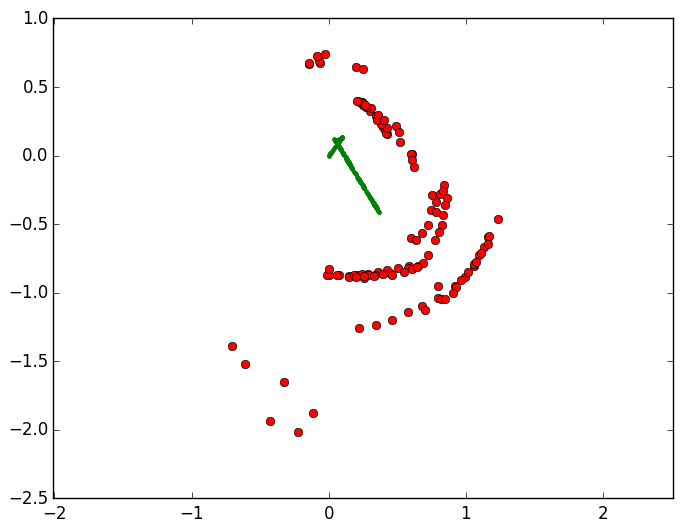

In [80]:
cla()
hold(true)
for m in maps
    plot([x[1] for x in m.points], [x[2] for x in m.points], "ro")
    plot([x.offset[1] for x in m.path], [x.offset[2] for x in m.path], "g.-")
    axis("equal")
end